In [1]:
!gdown 1tKau3v-KC0aTyPigTiA9tRRe-I5iT7bB

Downloading...
From: https://drive.google.com/uc?id=1tKau3v-KC0aTyPigTiA9tRRe-I5iT7bB
To: /content/transaction_data_updated.csv
100% 266k/266k [00:00<00:00, 56.5MB/s]


## Данные транзакции (мини-проект)

**Импорт набора данных из csv-файла в рабочем каталоге**

In [2]:
import pandas as pd

df = pd.read_csv('transaction_data_updated.csv')

df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


**Проверка количества строк и столбцов в наборе данных**

In [3]:
df.shape

(5315, 4)

**Проверка имен столбцов**

In [4]:
df.columns

Index(['date', 'name', 'transaction', 'minute'], dtype='object')

**Комментарии к столбцам набора данных:**
* date – время и диапазон дат (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – имя клиента
* transaction – статус транзакции
* minute - минута транзакции (взята из date)

**Проверка типов данных столбцов**

In [5]:
df.dtypes

,0
date,object
name,object
transaction,object
minute,int64


**Проверка описательной статистики**

In [14]:
df[['date', 'name', 'transaction']].describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


**Проверка количества пропущенных значений (NaN)**

In [15]:
df.isna().sum()

,0
date,0
name,0
transaction,0
minute,0


**Проверьте типы транзакций, которые у нас есть в наборе данных**

In [16]:
transaction_type = df['transaction'].value_counts()

transaction_type

,count
transaction,
successfull,3692
cancelled,1619
error,4


**Отображение значений подсчета типов транзакций**

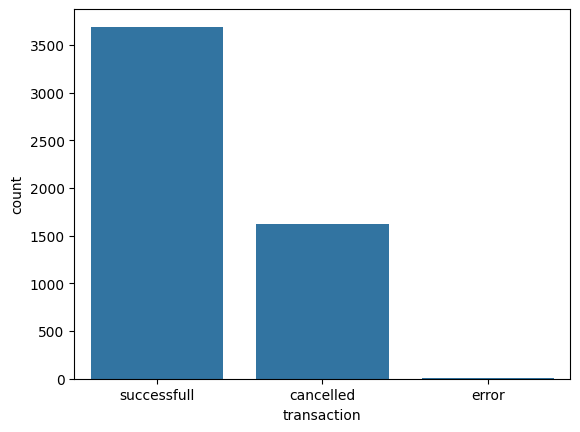

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


ax = sns.barplot(x=df['transaction'].value_counts().index, y=transaction_type)

**Построение графика в логарифмическом масштабе (для лучшего отображения значений ошибок на гистограмме)**

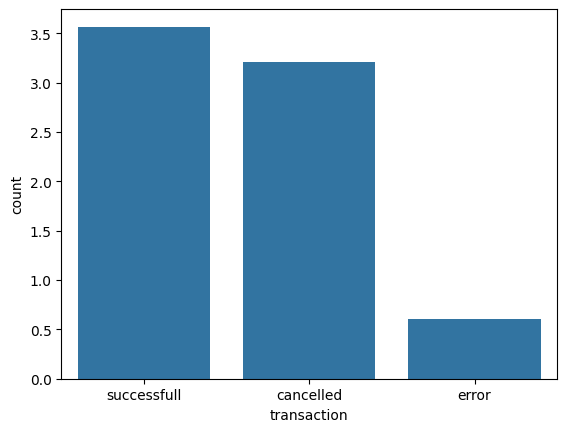

In [18]:
import numpy as np

ax = sns.barplot(x=df['transaction'].value_counts().index, y=np.log10(transaction_type))

**Подсчитайте количество успешных транзакций для каждого пользователя**

In [19]:
succesful_tr = df.query('transaction == "successfull"') \
    .groupby(['name'], as_index=False) \
    .agg({'date': 'nunique'}) \
    .sort_values('date', ascending=False) \
    .rename(columns={'date': 'successful_transactions'})


succesful_tr.head()

,name,successful_transactions
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78


**Проверка описательной статистики успешных транзакций**

In [20]:
succesful_tr.describe()

,successful_transactions
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


**График распределения успешных транзакций**

<ipython-input-21-b98ad6609ff7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(succesful_tr.successful_transactions, kde=False)


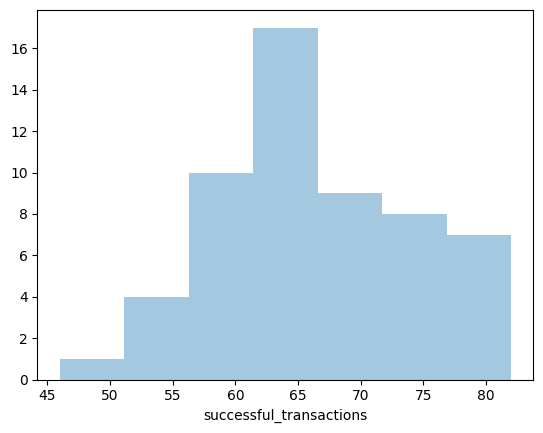

In [21]:
ax = sns.distplot(succesful_tr.successful_transactions, kde=False)

In [23]:
# ограничение количества строк для отправки0
pd.set_option('display.max_rows', 21)

**Создайте сводную таблицу, в которой индекс = "минута", столбцы = "name", значения = "количество транзакций". Заполните отсутствующие значения нулями.**

In [24]:
user_vs_minute_pivot = df\
    .groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction') \
    .fillna(0)

user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.0,0.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
56,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,3.0
57,1.0,1.0,2.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,...,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0


**График количества транзакций В СРАВНЕНИИ С минутами, прошедшими с начала дня**

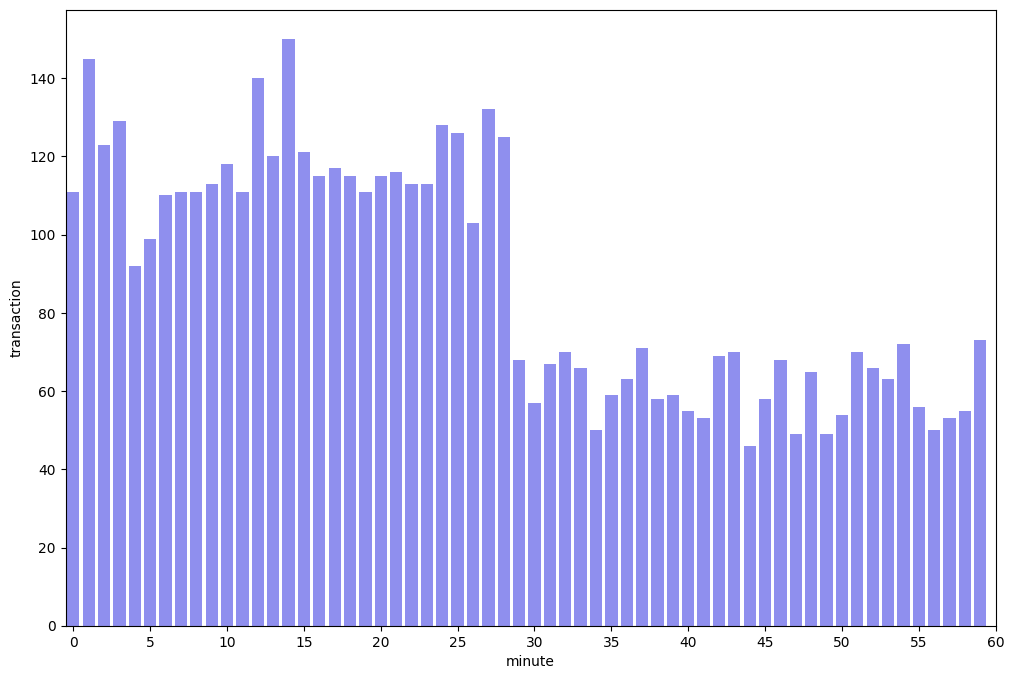

In [25]:
transaction_number = df.groupby(['minute'], as_index=False) \
    .agg({'transaction': 'count'})

ticks = [num for num in range(0, 65, 5)]
plt.figure(figsize=(12, 8))
sns.barplot(data=transaction_number, x='minute', y='transaction', color='blue', alpha=0.5)
plt.xticks(ticks=ticks, labels=ticks);

In [ ]:
# Гистограмма выглядит странно. Похоже, что в данных допущена ошибка:
# количество транзакций в диапазоне 0-30 минут
# примерно в два раза превышает количество транзакций в диапазоне 31-59 минут.

**Давайте исследуем наш набор данных и найдем причины, по которым гистограмма выглядит странно.**

In [26]:
# проверка времени начала обработки наших данных
df.date.min()

'2020-03-02 00:00:00'

In [27]:
# checking the end time of our data
df.date.max()

'2020-03-02 01:29:05'

In [ ]:
# Мы видим, что данные содержат диапазон в 90 минут, что означает, что фрейм данных
# имеет оценку ошибки в минутах. Минуты 0-30 включают также транзакции с интервалом времени
# 60-90 минут. Вот почему мы можем видеть там удвоенное количество транзакций.

**Исправляем ошибку, которую мы только что обнаружили**

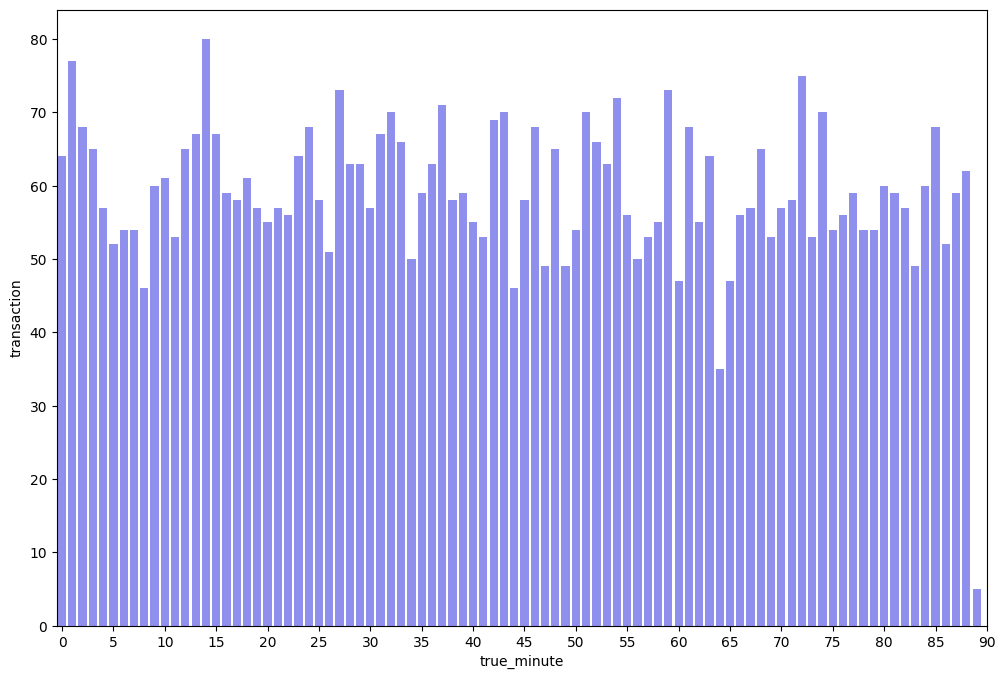

In [28]:
# сначала мы преобразуем дату в формат datetime
df['date'] = pd.to_datetime(df.date)

# затем мы правильно подсчитываем минуты, прошедшие с начала рабочего дня
df['true_minute'] = df.date.dt.minute + (60 * df.date.dt.hour)

# наконец, давайте построим обновленный график
transaction_number = df.groupby(['true_minute'], as_index=False) \
    .agg({'transaction': 'count'})

ticks = [num for num in range(0, 95, 5)]
plt.figure(figsize=(12, 8))
sns.barplot(data=transaction_number, x='true_minute', y='transaction', color='blue', alpha=0.5)
plt.xticks(ticks=ticks, labels=ticks);

# now we can see that transactions are distributed properly over the investigated time period